In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
import pandas as pd

df = pd.read_csv('AAPL.csv')
print(df.columns)


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [26]:
print(df.head())
print(df.dtypes)


        Price              Close               High                Low  \
0      Ticker               AAPL               AAPL               AAPL   
1        Date                NaN                NaN                NaN   
2  2020-01-02  72.53851318359375  72.59889150198023  71.29230380764884   
3  2020-01-03  71.83329772949219  72.59406313642577  71.60869213351766   
4  2020-01-06  72.40567016601562   72.4443131708714  70.70300468370534   

                Open     Volume  
0               AAPL       AAPL  
1                NaN        NaN  
2  71.54588979671196  135480400  
3  71.76567430155144  146322800  
4  70.95418053006813  118387200  
Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [27]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')  # Convert to float, set invalids to NaN
df = df.dropna(subset=['Close'])  # Remove rows with NaN in 'Close'


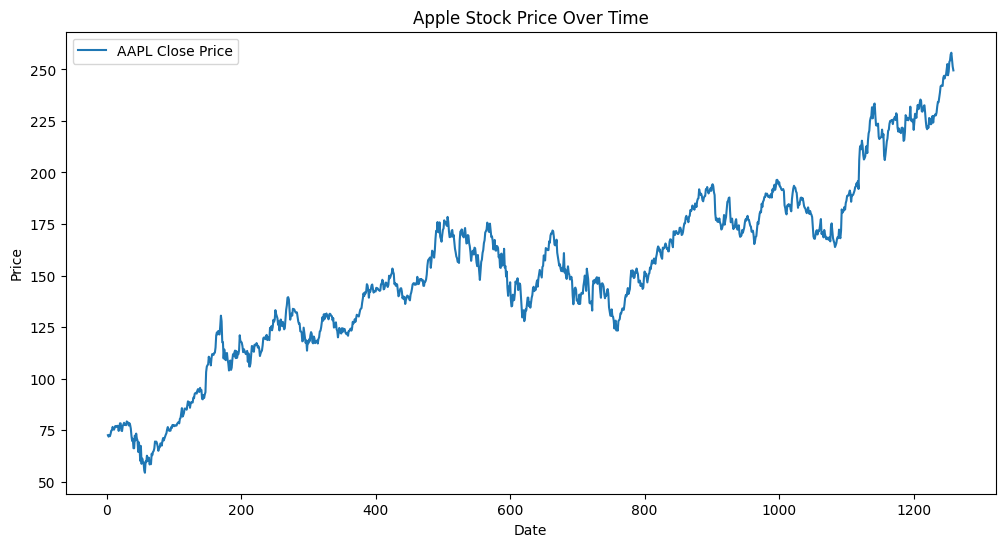

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='AAPL Close Price')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [29]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] < 0.05:
        print("Series is stationary")
    else:
        print("Series is not stationary")

adf_test(df['Close'])

ADF Statistic: -0.7084051812587225
p-value: 0.8445603772820015
Critical Values:
   1%: -3.4355629707955395
   5%: -2.863842063387667
   10%: -2.567995644141416
Series is not stationary


In [30]:
df_diff = df['Close'].diff().dropna()
adf_test(df_diff)

ADF Statistic: -35.93868324187365
p-value: 0.0
Critical Values:
   1%: -3.4355671297788666
   5%: -2.8638438984080117
   10%: -2.5679966213893057
Series is stationary


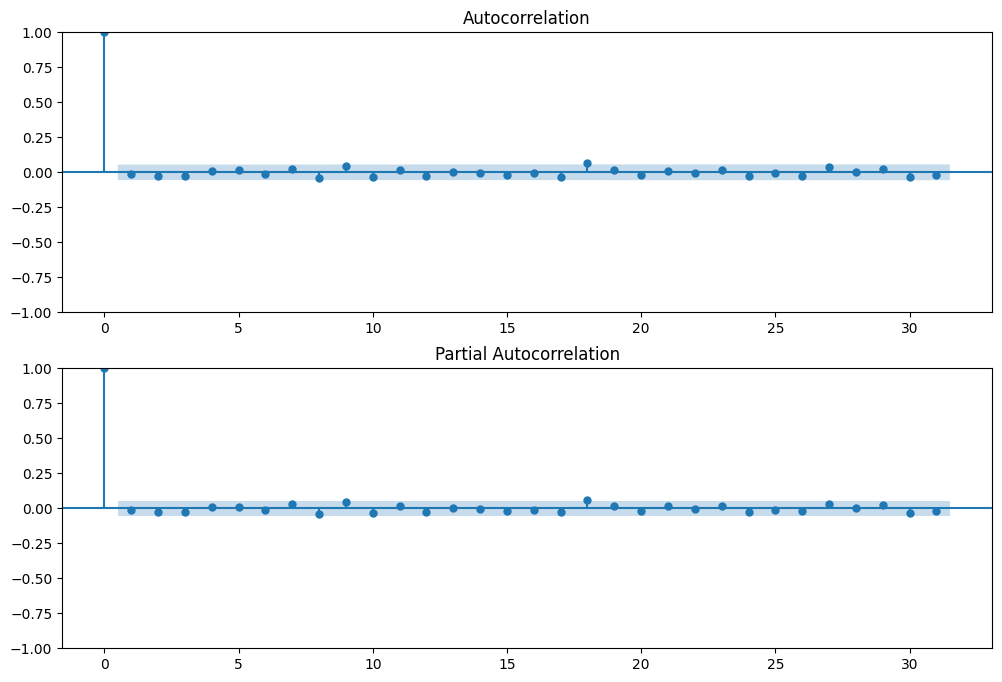

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_diff, ax=ax[0])
plot_pacf(df_diff, ax=ax[1])
plt.show()

In [32]:
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

In [33]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\SATHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SATHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SATHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2383.549
Date:                Mon, 22 Sep 2025   AIC                           4773.098
Time:                        21:07:21   BIC                           4787.837
Sample:                             0   HQIC                          4778.699
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3903      0.509      0.767      0.443      -0.608       1.388
ma.L1         -0.4323      0.502     -0.861      0.389      -1.416       0.552
sigma2         6.7225      0.227     29.639      0.0

In [34]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

c:\Users\SATHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


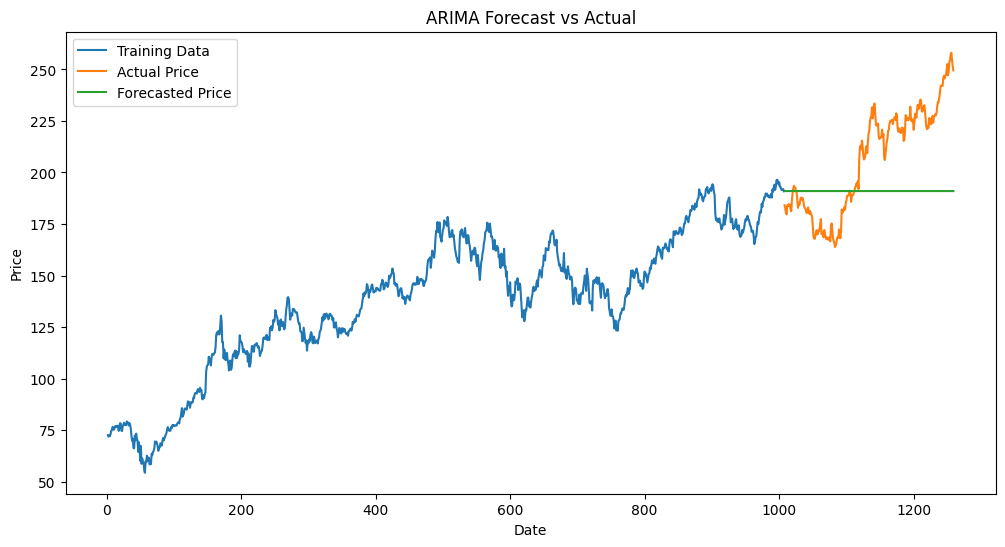

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Price')
plt.plot(forecast.index, forecast, label='Forecasted Price')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.2f}')

RMSE: 29.68
